In [71]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from pandas.plotting import scatter_matrix

In [72]:
# Load datasets
x_train = pd.read_csv('./Xtrain_hgcGIrA.csv')
y_train = pd.read_csv('./Ytrain_yL5OjS4.csv')
x_test = pd.read_csv('./Xtest.csv')
y_sample = pd.read_csv('./Ysample_iX1anNa.csv')

# Exploration


In [73]:
# Basic Exploration
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_sample:", y_sample.shape)

Shape of x_train: (31119, 12)
Shape of y_train: (31119, 2)
Shape of x_test: (13752, 12)
Shape of y_sample: (13752, 2)


In [74]:
# Describe the data
print(x_train.describe())

              train      way   composition          p1q0          p2q0  \
count  31119.000000  31119.0  31119.000000  29067.000000  26974.000000   
mean      27.067965      0.0      1.999647      0.234769      0.251392   
std       15.979186      0.0      0.018798      0.166153      0.143506   
min        1.000000      0.0      1.000000      0.000000      0.000000   
25%       13.000000      0.0      2.000000      0.094000      0.136000   
50%       26.000000      0.0      2.000000      0.192000      0.230000   
75%       41.000000      0.0      2.000000      0.363000      0.354000   
max       55.000000      0.0      2.000000      0.934000      0.937000   

               p3q0          p0q1          p0q2          p0q3  
count  24935.000000  27917.000000  24720.000000  21527.000000  
mean       0.316867      0.207200      0.222167      0.209845  
std        0.150974      0.134709      0.147600      0.144858  
min        0.000000      0.004000      0.004000      0.004000  
25%        0.

In [86]:
x_train.head()

,date,train,way,station,hour,composition,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3,p0q0,log_p1q0,log_p2q0,log_p3q0,log_p0q1,log_p0q2,log_p0q3
0,2019-01-07,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.201,0.138,0.091,0.216,NaN,NaN,NaN,0.183155,0.129272,0.087095
1,2019-01-08,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.204,0.152,0.106,0.216,NaN,NaN,NaN,0.185649,0.141500,0.100750
2,2019-01-10,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.213,0.153,0.111,0.227,NaN,NaN,NaN,0.193097,0.142367,0.105261
3,2019-01-11,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.213,0.152,0.108,0.229,NaN,NaN,NaN,0.193097,0.141500,0.102557
4,2019-01-14,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.210,0.147,0.096,0.225,NaN,NaN,NaN,0.190620,0.137150,0.091667


In [76]:
# Print types of data
print(x_train.dtypes)

date            object
train            int64
way              int64
station         object
hour            object
composition      int64
p1q0           float64
p2q0           float64
p3q0           float64
p0q1           float64
p0q2           float64
p0q3           float64
dtype: object


In [77]:
# Check for missing values
print(x_train.isnull().sum())

date              0
train             0
way               0
station           0
hour           3204
composition       0
p1q0           2052
p2q0           4145
p3q0           6184
p0q1           3202
p0q2           6399
p0q3           9592
dtype: int64


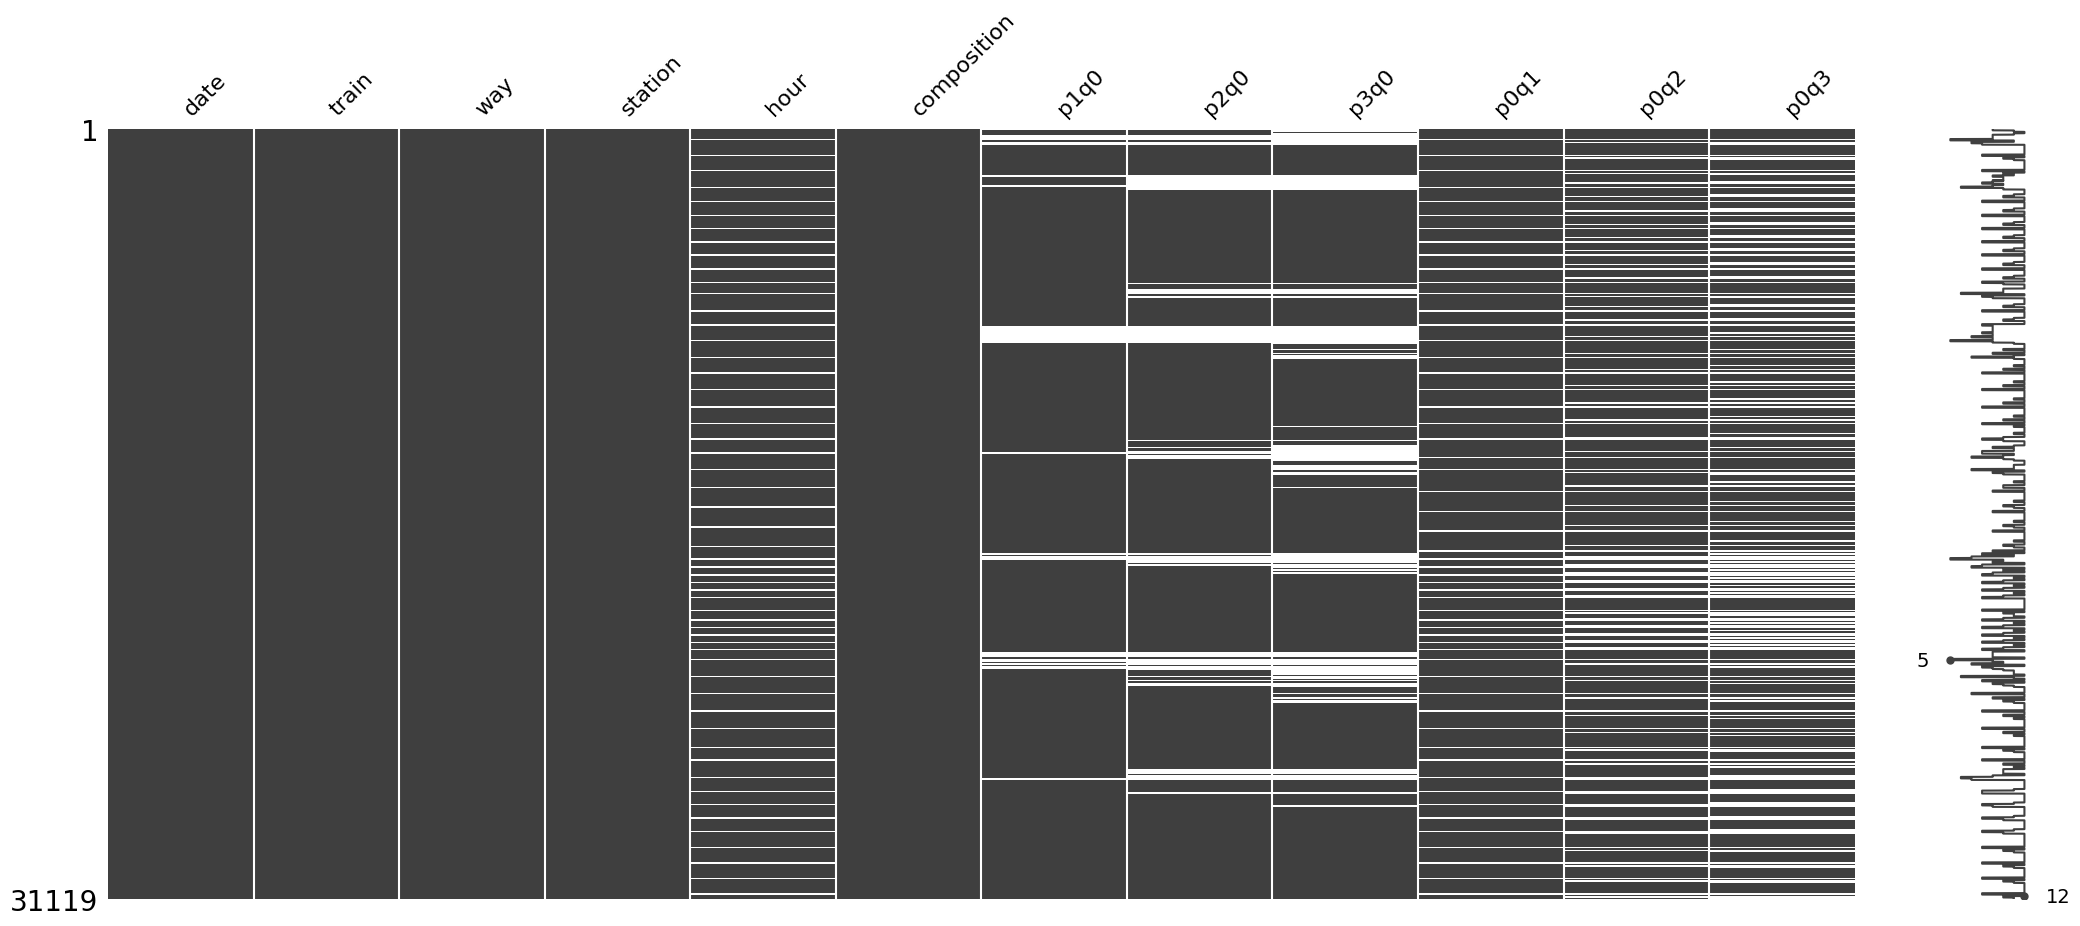

In [78]:
# Visualize missing data
msno.matrix(x_train)
plt.show()

In [79]:
# Summary statistics for numerical variables
print(x_train.describe())

              train      way   composition          p1q0          p2q0  \
count  31119.000000  31119.0  31119.000000  29067.000000  26974.000000   
mean      27.067965      0.0      1.999647      0.234769      0.251392   
std       15.979186      0.0      0.018798      0.166153      0.143506   
min        1.000000      0.0      1.000000      0.000000      0.000000   
25%       13.000000      0.0      2.000000      0.094000      0.136000   
50%       26.000000      0.0      2.000000      0.192000      0.230000   
75%       41.000000      0.0      2.000000      0.363000      0.354000   
max       55.000000      0.0      2.000000      0.934000      0.937000   

               p3q0          p0q1          p0q2          p0q3  
count  24935.000000  27917.000000  24720.000000  21527.000000  
mean       0.316867      0.207200      0.222167      0.209845  
std        0.150974      0.134709      0.147600      0.144858  
min        0.000000      0.004000      0.004000      0.004000  
25%        0.

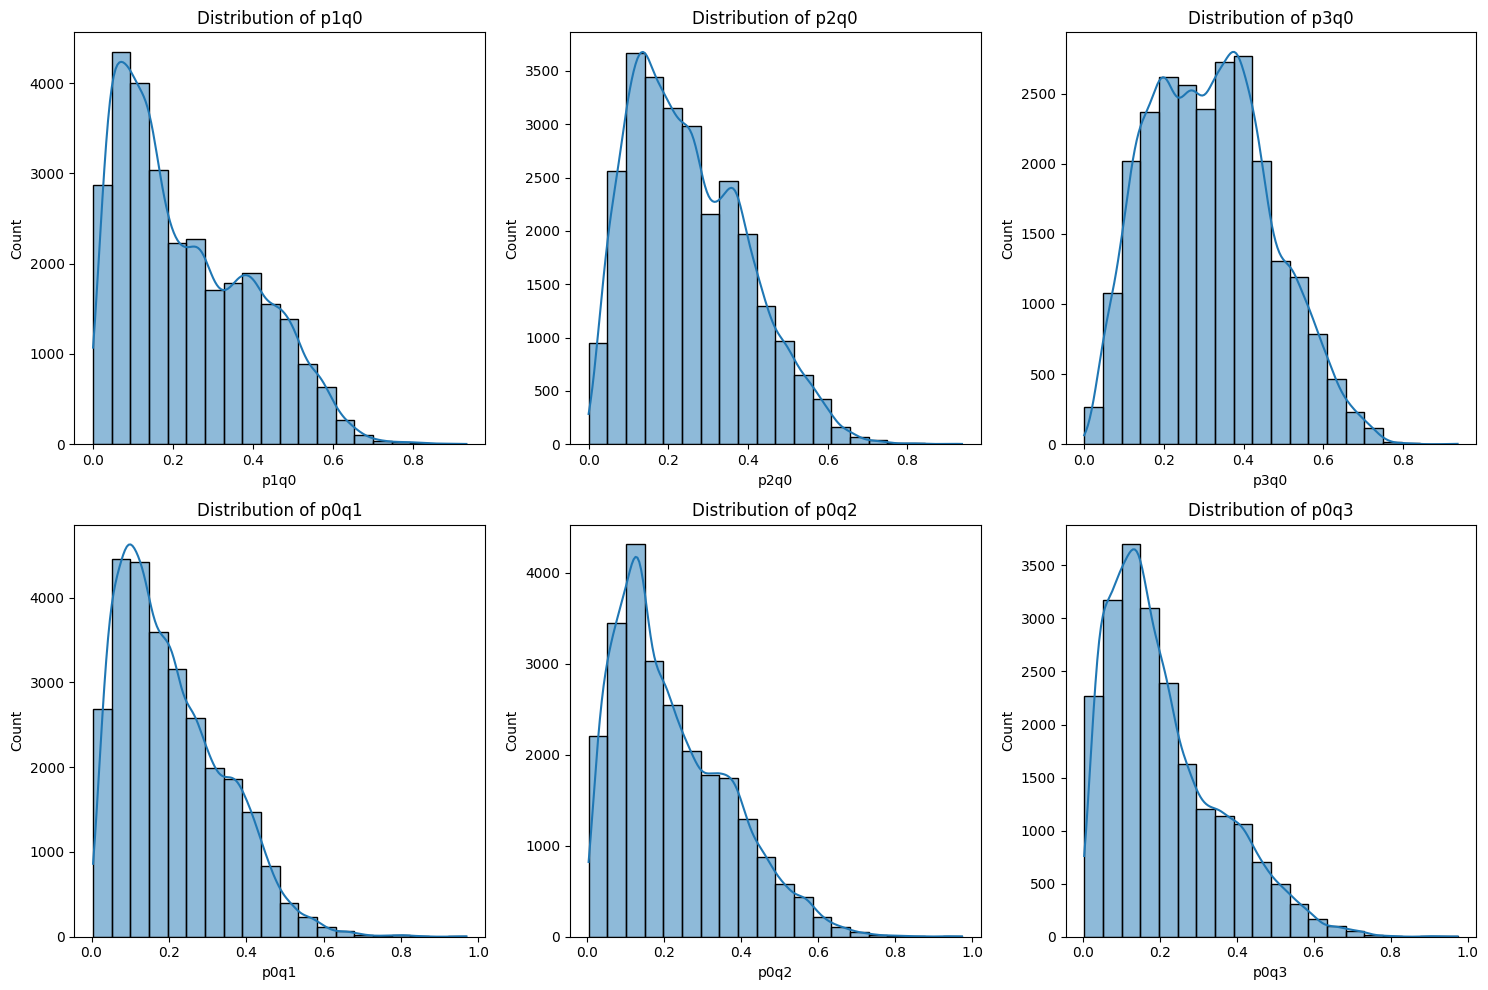

In [80]:
# Add p0q0
x_train['p0q0'] = y_train['p0q0']

# Explore distribution of lag variables
lag_cols = ['p1q0', 'p2q0', 'p3q0', 'p0q1', 'p0q2', 'p0q3']

plt.figure(figsize=(15, 10))
for i, col in enumerate(lag_cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(x_train[col].dropna(), bins=20, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

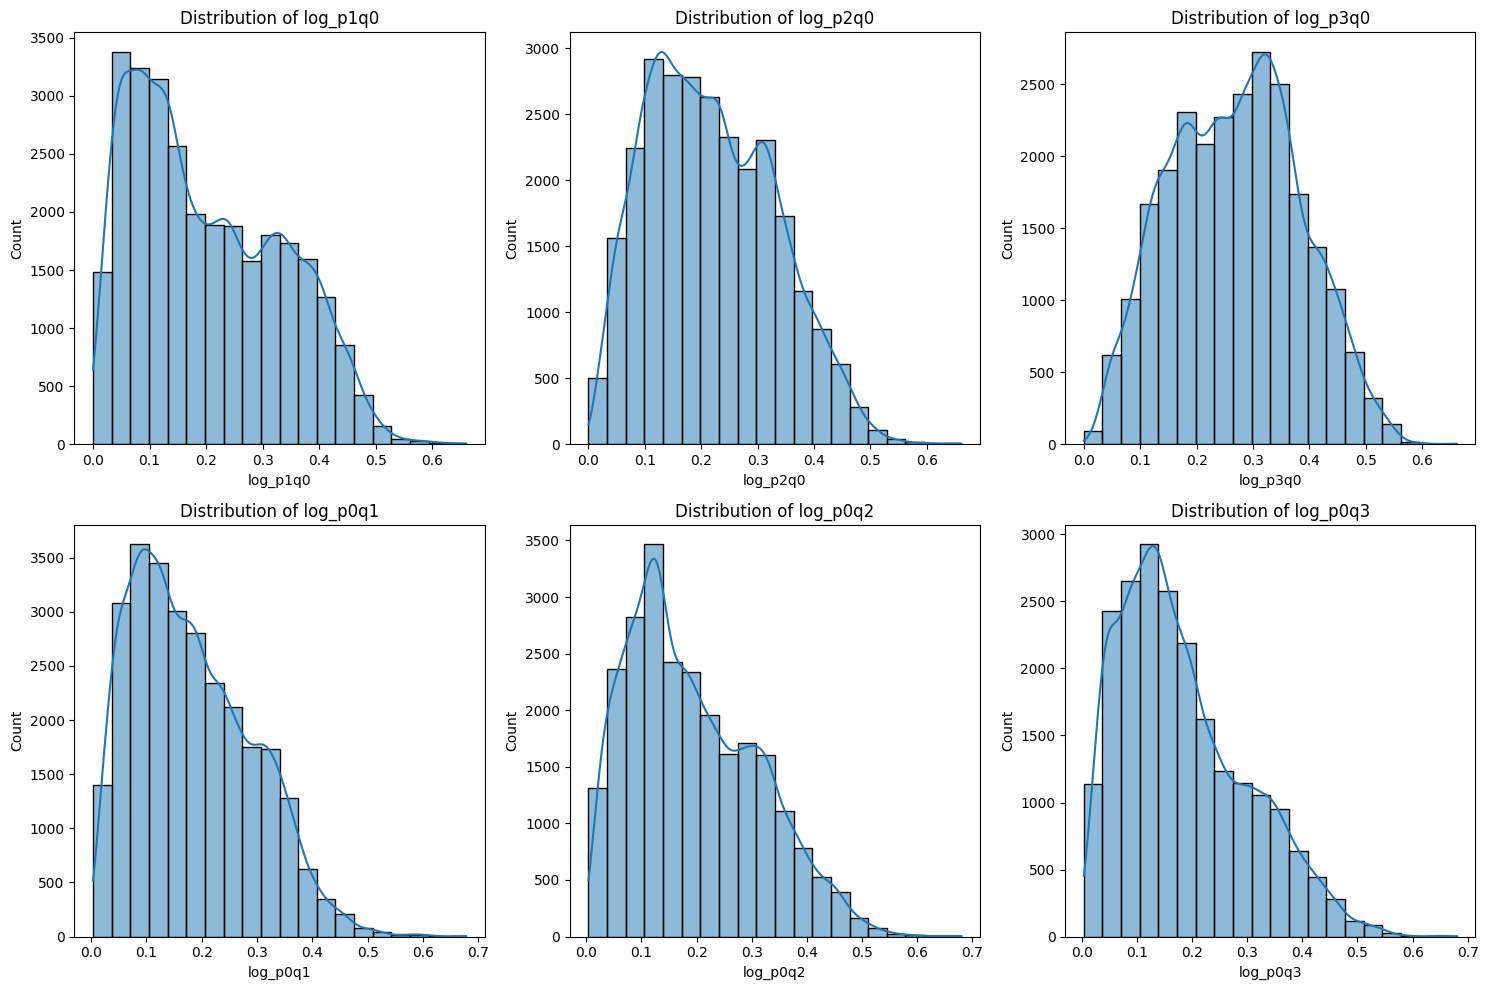

In [81]:
# Explore distribution of log lag variables

# Create log lag variables
for col in lag_cols:
    x_train[f'log_{col}'] = np.log1p(x_train[col])

log_lag_cols = ['log_p1q0', 'log_p2q0', 'log_p3q0', 'log_p0q1', 'log_p0q2', 'log_p0q3']

plt.figure(figsize=(15, 10))
for i, col in enumerate(log_lag_cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(x_train[col].dropna(), bins=20, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

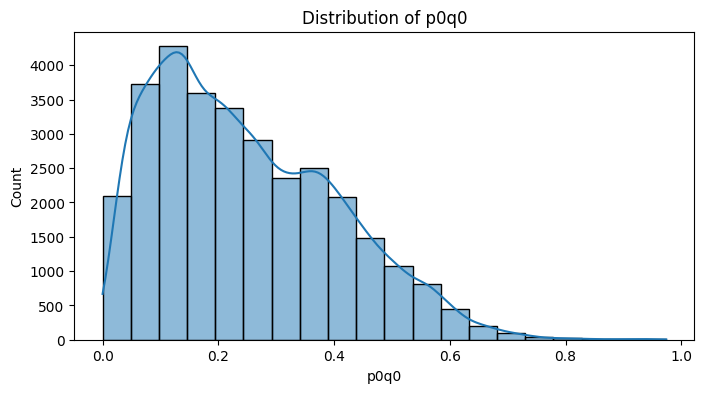

In [82]:
# Plot y_train
plt.figure(figsize=(8, 4))
sns.histplot(y_train["p0q0"].dropna(), bins=20, kde=True)
plt.title('Distribution of p0q0')
plt.show()

# Data visualization
- **p0q0**: Occupancy rate of the current train at the next station (value to predict).
  
- **p1q0**: Occupancy rate of the previous train at the same station.
- **p2q0**: Occupancy rate of the second previous train at the same station.
- **p3q0**: Occupancy rate of the third previous train at the same station.
  
- **p0q1**: Occupancy rate of the same train at the previous station.
- **p0q2**: Occupancy rate of the same train at the second previous station.
- **p0q3**: Occupancy rate of the same train at the third previous station.

In [100]:
x_train.head(5)

,date,train,way,station,hour,composition,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3,p0q0,log_p1q0,log_p2q0,log_p3q0,log_p0q1,log_p0q2,log_p0q3
0,2019-01-07,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.201,0.138,0.091,0.216,NaN,NaN,NaN,0.183155,0.129272,0.087095
1,2019-01-08,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.204,0.152,0.106,0.216,NaN,NaN,NaN,0.185649,0.141500,0.100750
2,2019-01-10,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.213,0.153,0.111,0.227,NaN,NaN,NaN,0.193097,0.142367,0.105261
3,2019-01-11,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.213,0.152,0.108,0.229,NaN,NaN,NaN,0.193097,0.141500,0.102557
4,2019-01-14,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.210,0.147,0.096,0.225,NaN,NaN,NaN,0.190620,0.137150,0.091667


In [104]:
# Convert 'hour' column to datetime format
x_train['hour'] = pd.to_datetime(x_train['hour'], format='%H:%M:%S')

min_hour = x_train['hour'].min()
max_hour = x_train['hour'].max()

print(f'Minimum hour: {min_hour}')
print(f'Maximum hour: {max_hour}')

Minimum hour: 1900-01-01 06:00:00
Maximum hour: 1900-01-01 11:00:00


In [113]:
station = x_train['station'].value_counts().idxmax()
date = '2019-02-11'


# Filter the data for the first train and the specific date
train_data = x_train[(x_train['station'] == station) & (x_train['date'] == date)]

# Filter by the train with the most data

# Convert the hour column to datetime format
train_data['hour'] = pd.to_datetime(train_data['hour'], format='%H:%M:%S')

/tmp/ipykernel_399296/3249929758.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['hour'] = pd.to_datetime(train_data['hour'], format='%H:%M:%S')


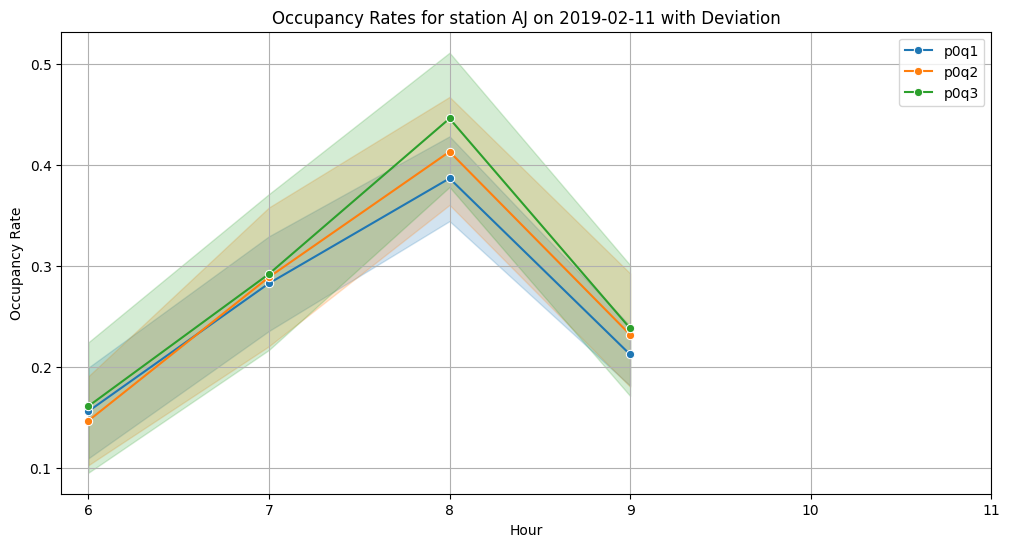

In [119]:
# Plot p0q1, p0q2, and p0q3 against the hour with deviation
plt.figure(figsize=(12, 6))
sns.lineplot(x=train_data['hour'].dt.hour + train_data['hour'].dt.minute / 60, y=train_data['p0q1'], marker='o', label='p0q1')
sns.lineplot(x=train_data['hour'].dt.hour + train_data['hour'].dt.minute / 60, y=train_data['p0q2'], marker='o', label='p0q2')
sns.lineplot(x=train_data['hour'].dt.hour + train_data['hour'].dt.minute / 60, y=train_data['p0q3'], marker='o', label='p0q3')
plt.title(f'Occupancy Rates for station {station} on {date} with Deviation')
plt.xlabel('Hour')
plt.ylabel('Occupancy Rate')
plt.xticks(range(min_hour.hour, max_hour.hour + 1))
plt.legend()
plt.grid(True)
plt.show()

# Correlations


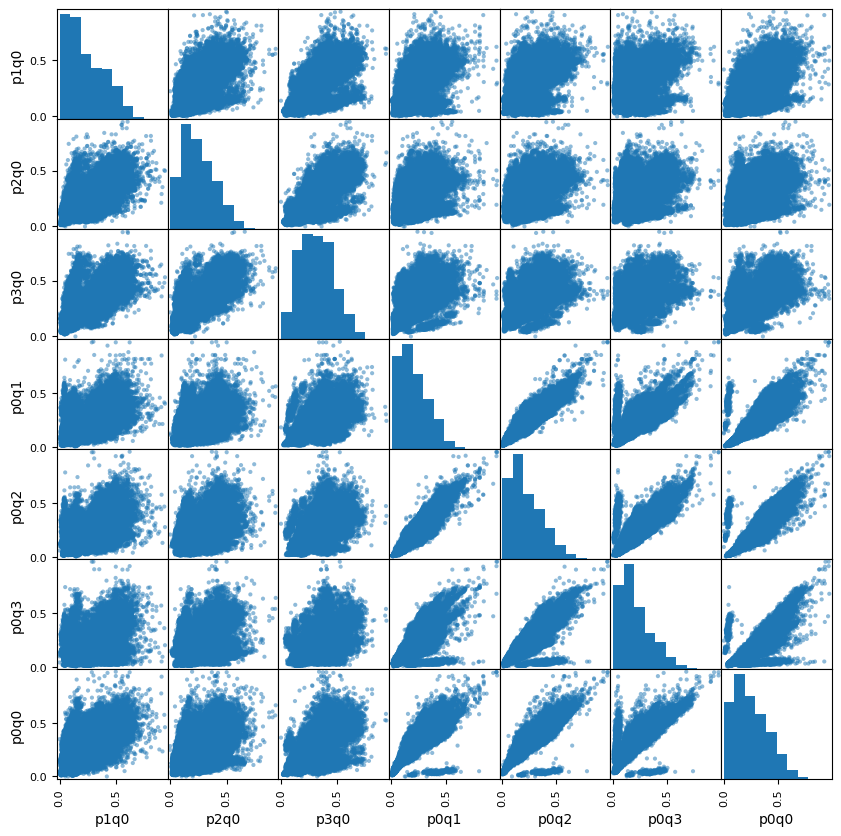

In [14]:
# Define the columns to plot
columns_to_plot = ['p1q0', 'p2q0', 'p3q0', 'p0q1', 'p0q2', 'p0q3', 'p0q0']

# Create the scatter matrix plot
sm = scatter_matrix(x_train[columns_to_plot], figsize=(10, 10))

# Display the plot
plt.show()

In [15]:
# import requests

# url = 'https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py'
# response = requests.get(url)

# with open('visualization.py', 'wb') as file:
#   file.write(response.content)

In [16]:
import visualization

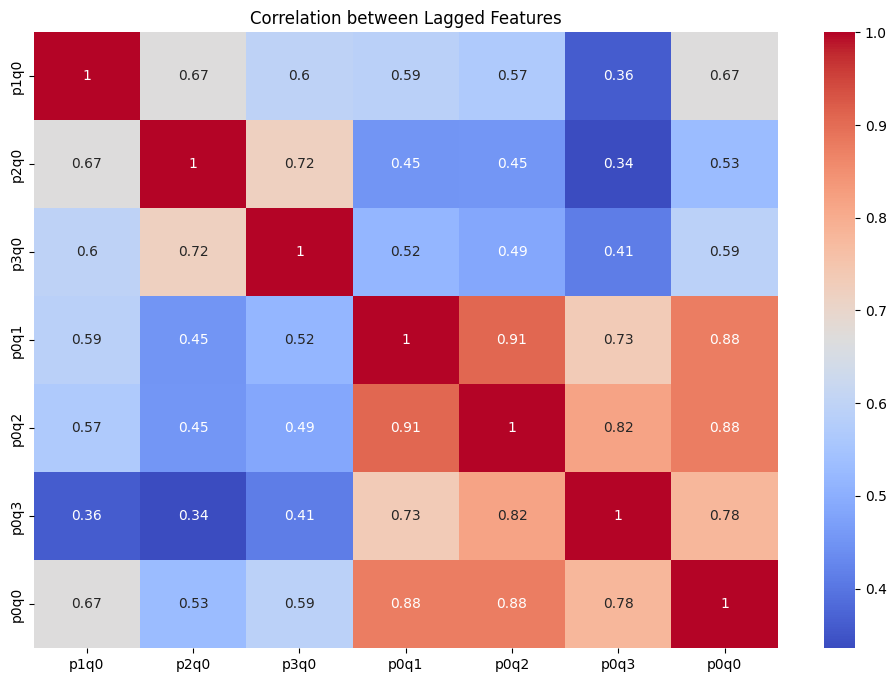

In [17]:
# Visualizing correlations with lagged features
lag_features = ['p1q0', 'p2q0', 'p3q0', 'p0q1', 'p0q2', 'p0q3', 'p0q0']
plt.figure(figsize=(12, 8))
sns.heatmap(x_train[lag_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Lagged Features')
plt.show()

Its possible to notice a high correlation (> 0.80) between the features:

- `p0q1` and `p0q2` (0.91)
- `p0q2` and `p0q3` (0.82)


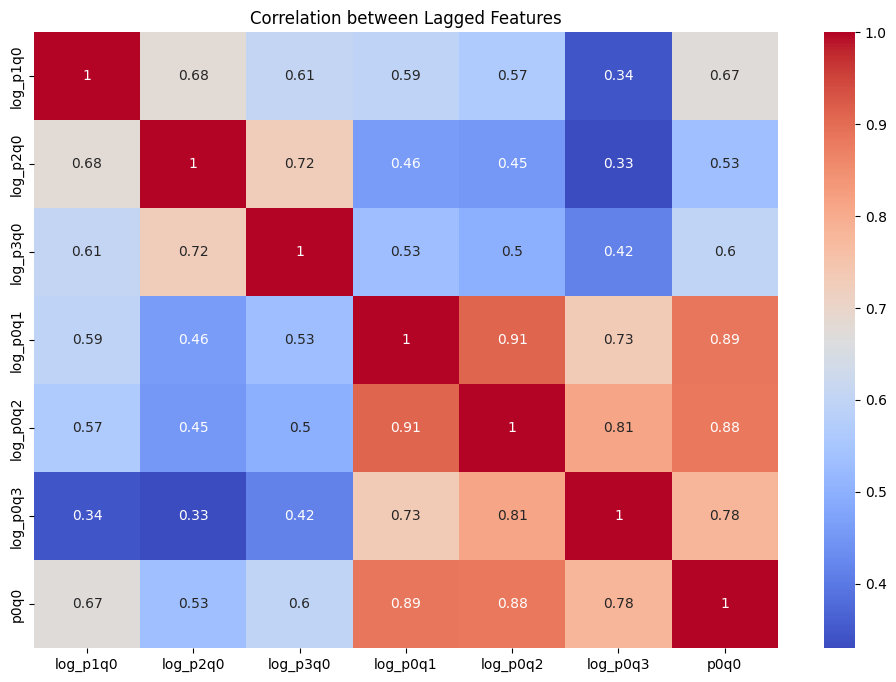

In [18]:
# Visualizing correlations with log lagged features
log_lag_features = ['log_p1q0', 'log_p2q0', 'log_p3q0', 'log_p0q1', 'log_p0q2', 'log_p0q3', 'p0q0']
plt.figure(figsize=(12, 8))
sns.heatmap(x_train[log_lag_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Lagged Features')
plt.show()

In [17]:
#! wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/feature_engineering.py
import feature_engineering

In [20]:
# Compare the correlation between log lagged features and not log lagged features with respect to p0q0

log_lag_corr = feature_engineering.get_features_correlated_to_target(x_train[log_lag_features],
                                    target_feature='p0q0')

lag_corr = feature_engineering.get_features_correlated_to_target(x_train[lag_features], target_feature='p0q0')

print("Correlation with log lagged features:")
print(log_lag_corr)
print("\nAverage correlation with log lagged features:", log_lag_corr.mean())

print("\nCorrelation with lagged features:")
print(lag_corr)
print("\nAverage correlation with lagged features:", lag_corr.mean())



Correlation with log lagged features:
p0q0        1.00
log_p0q1    0.89
log_p0q2    0.88
log_p0q3    0.78
log_p1q0    0.67
log_p3q0    0.60
log_p2q0    0.53
Name: p0q0, dtype: float64

Average correlation with log lagged features: 0.7642857142857142

Correlation with lagged features:
p0q0    1.00
p0q1    0.88
p0q2    0.88
p0q3    0.78
p1q0    0.67
p3q0    0.59
p2q0    0.53
Name: p0q0, dtype: float64

Average correlation with lagged features: 0.7614285714285715


Worse correlation when using the log of the features

In [21]:
# Remove the log lag features
x_train = x_train.drop(log_lag_features, axis=1)

# Preprocessing


In [28]:
#!pip install category_encoders
import category_encoders as ce

In [23]:
# get number of unique stations
print("Number of stations:", len(np.unique(x_train['station'])))

Number of stations: 36


In [29]:
def preprocess_data(x_train, y_train, silent=True):
    x_train_processed = x_train.copy()

    # Remove the way column
    x_train_processed.drop('way', axis=1, inplace=True)

    # Extract year, month and day from date
    x_train_processed['date'] = pd.to_datetime(
        x_train_processed['date'], format='%Y-%m-%d')
    x_train_processed['month'] = x_train_processed['date'].dt.month
    x_train_processed['day'] = x_train_processed['date'].dt.day

    # Extract day of the week
    x_train_processed['day_of_week'] = x_train_processed['date'].dt.dayofweek

    # Remove the date column
    x_train_processed.drop('date', axis=1, inplace=True)

    # Make hour a numerical value by hh + mm/60 + ss/3600
    x_train_processed['hour'] = pd.to_datetime(
        x_train_processed['hour'], format='%H:%M:%S')
    x_train_processed['hour_num'] = x_train_processed['hour'].dt.hour + \
        x_train_processed['hour'].dt.minute/60 + \
        x_train_processed['hour'].dt.second/3600

    # Remove the hour column
    x_train_processed.drop('hour', axis=1, inplace=True)

    # Add column p0q0
    x_train_processed['p0q0'] = y_train['p0q0']

    if not silent:
        print('=' * 10, 'X_train_processed.head()', '=' * 10)
        print(x_train_processed.head())

    # Transform day_of_week and station to one-hot encoding
    encoder = ce.OneHotEncoder(
        cols=['day_of_week', 'station'], use_cat_names=True)
    x_train_encoded = encoder.fit_transform(x_train_processed)

    if not silent:
        print('=' * 10, 'x_train_encoded.head()', '=' * 10)
        print(x_train_encoded.head())

    return x_train_encoded


processed_training_features = preprocess_data(x_train, y_train, silent=False)

========== X_train_processed.head() ==========
   train station  composition  p1q0  p2q0  p3q0   p0q1   p0q2   p0q3   p0q0  \
0      1      AD            2   NaN   NaN   NaN  0.201  0.138  0.091  0.216   
1      1      AD            2   NaN   NaN   NaN  0.204  0.152  0.106  0.216   
2      1      AD            2   NaN   NaN   NaN  0.213  0.153  0.111  0.227   
3      1      AD            2   NaN   NaN   NaN  0.213  0.152  0.108  0.229   
4      1      AD            2   NaN   NaN   NaN  0.210  0.147  0.096  0.225   

   log_p1q0  log_p2q0  log_p3q0  log_p0q1  log_p0q2  log_p0q3  month  day  \
0       NaN       NaN       NaN  0.183155  0.129272  0.087095      1    7   
1       NaN       NaN       NaN  0.185649  0.141500  0.100750      1    8   
2       NaN       NaN       NaN  0.193097  0.142367  0.105261      1   10   
3       NaN       NaN       NaN  0.193097  0.141500  0.102557      1   11   
4       NaN       NaN       NaN  0.190620  0.137150  0.091667      1   14   

   day_of_week 

# Checking correlations again


In [30]:
# Lets make a df with the P0q0 values
corr_df = processed_training_features.copy()

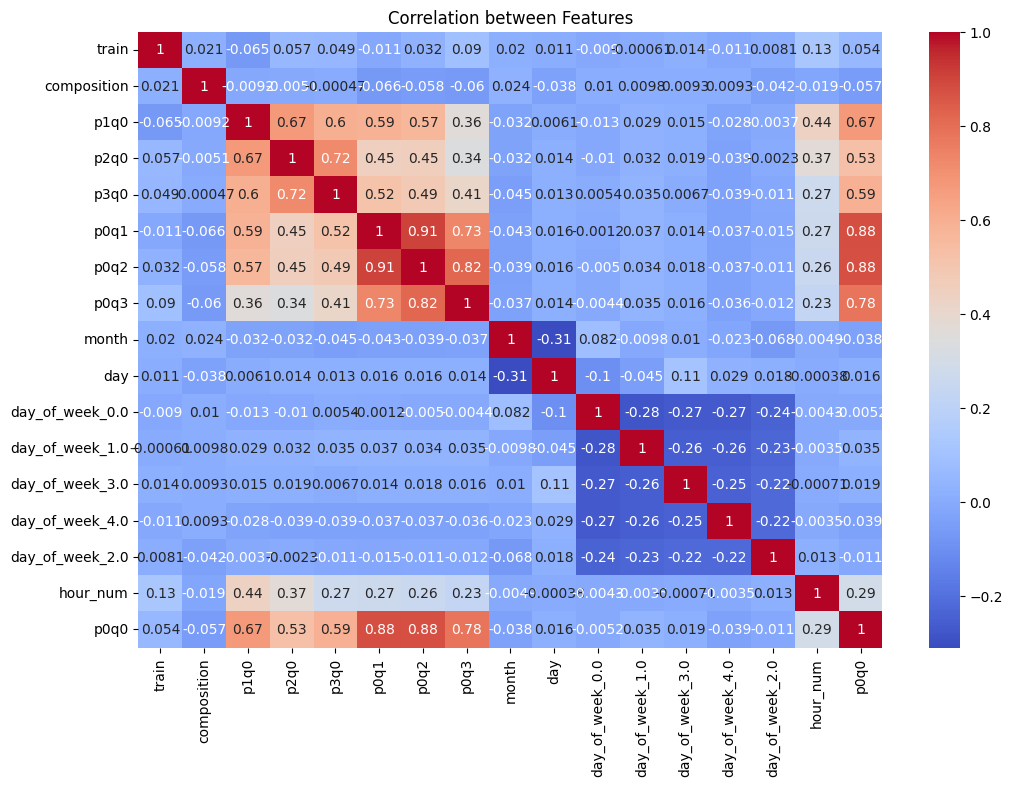

In [26]:
# Visualizing correlations with all features except station
all_feature_cols = [col for col in processed_training_features.columns if 'station' not in col]
plt.figure(figsize=(12, 8))
sns.heatmap(corr_df[all_feature_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Features')
plt.show()


In [27]:
# see the correlation of the features with the target p0q0
feature_engineering.get_features_correlated_to_target(corr_df[all_feature_cols],
                                    target_feature='p0q0').head(30)

p0q0               1.00
p0q1               0.88
p0q2               0.88
p0q3               0.78
p1q0               0.67
p3q0               0.59
p2q0               0.53
hour_num           0.29
composition       -0.06
train              0.05
day_of_week_1.0    0.04
day_of_week_4.0   -0.04
month             -0.04
day_of_week_3.0    0.02
day                0.02
day_of_week_0.0   -0.01
day_of_week_2.0   -0.01
Name: p0q0, dtype: float64

# Regression

In [126]:
import math  # for sqrt
from statistics import mean

#!wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/andrea_models.py
from andrea_models import AndreaLinearRegression  # In the course library
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [15]:
# Drop all lines with missing values
processed_training_features = processed_training_features.dropna()

df_train, df_test = train_test_split(processed_training_features, test_size=0.3, random_state=25)

y_test = df_test['p0q0']

print('Training samples ', df_train.shape[0], '; Test samples ', df_test.shape[0])

df_test.head()

Training samples  12366 ; Test samples  5300


,train,station_AD,station_AI,station_AJ,station_AK,station_AM,station_AT,station_AW,station_AX,station_BB,...,p0q3,month,day,day_of_week_0.0,day_of_week_1.0,day_of_week_3.0,day_of_week_4.0,day_of_week_2.0,hour_num,p0q0
18052,36,0,0,0,0,0,0,0,0,1,...,0.173,1,9,0,0,0,0,1,7.0,0.316
23959,49,0,0,0,0,0,0,0,0,0,...,0.056,5,13,1,0,0,0,0,8.0,0.069
25589,50,0,0,0,0,0,0,0,0,0,...,0.181,1,15,0,1,0,0,0,9.0,0.214
19182,4,0,0,1,0,0,0,0,0,0,...,0.357,4,3,0,0,0,0,1,7.0,0.381
19257,4,0,0,0,0,1,0,0,0,0,...,0.171,1,15,0,1,0,0,0,7.0,0.382


In [18]:
all_feature_cols = [col for col in df_train.columns if 'p0q0' not in col]

non_constant_features = feature_engineering.low_var_features(df_train, threshold=0)

print("Cols", all_feature_cols)
print("Number of non-constant features:", len(non_constant_features), "out of", len(all_feature_cols))

Cols ['train', 'station_AD', 'station_AI', 'station_AJ', 'station_AK', 'station_AM', 'station_AT', 'station_AW', 'station_AX', 'station_BB', 'station_BD', 'station_BE', 'station_AE', 'station_AL', 'station_AO', 'station_AQ', 'station_BC', 'station_AB', 'station_AN', 'station_AS', 'station_BF', 'station_BG', 'station_BH', 'station_AV', 'station_AF', 'station_AP', 'station_AZ', 'station_AA', 'station_AC', 'station_AG', 'station_AH', 'station_AR', 'station_AU', 'station_BA', 'station_BI', 'station_BJ', 'station_AY', 'composition', 'p1q0', 'p2q0', 'p3q0', 'p0q1', 'p0q2', 'p0q3', 'month', 'day', 'day_of_week_0.0', 'day_of_week_1.0', 'day_of_week_3.0', 'day_of_week_4.0', 'day_of_week_2.0', 'hour_num']
Number of non-constant features: 40 out of 52


In [31]:
non_station_cols = [col for col in all_feature_cols if 'station' not in col]

df_train[non_station_cols].head()


,train,composition,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3,month,day,day_of_week_0.0,day_of_week_1.0,day_of_week_3.0,day_of_week_4.0,day_of_week_2.0,hour_num
3434,14,2,0.452,0.33600,0.353000,0.281,0.371,0.315,3,20,0,0,0,0,1,7.0
7851,21,2,0.327,0.27300,0.388000,0.220,0.312,0.264,2,19,0,1,0,0,0,9.0
5176,18,2,0.181,0.23485,0.259685,0.155,0.104,0.082,5,10,0,0,0,1,0,8.0
15174,31,2,0.295,0.35900,0.368000,0.511,0.423,0.060,3,28,0,0,1,0,0,7.0
24752,5,2,0.394,0.40800,0.457000,0.403,0.464,0.446,3,21,0,0,1,0,0,7.0


In [27]:
# Print shape
print("df_train.shape:", df_train[all_feature_cols].shape)

x_train = df_train[all_feature_cols].values
y_train = df_train['p0q0'].values

df_train.shape: (12366, 52)


In [28]:
all_features_model = AndreaLinearRegression()
all_features_model.fit(x_train, y_train, column_names=all_feature_cols)
all_features_model.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     4775.
Date:                Wed, 04 Dec 2024   Prob (F-statistic):               0.00
Time:                        14:05:49   Log-Likelihood:                 23486.
No. Observations:               12366   AIC:                        -4.690e+04
Df Residuals:                   12328   BIC:                        -4.661e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept           0.2246      0.023     

In [29]:
X_test = df_test[all_feature_cols].values

print('X_test.shape:', X_test.shape)
y_pred = all_features_model.predict(X_test)
y_test = df_test['p0q0']


RMSE_all_features = math.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE now: ', RMSE_all_features)

X_test.shape: (5300, 52)
RMSE now:  0.036931929463619506


In [35]:
k_fold = KFold(n_splits=4, shuffle=True, random_state=5)

x = processed_training_features[all_feature_cols].values
y = processed_training_features['p0q0'].values

# Print shapes
print(x.shape)
print(y.shape)

# Cross validation works with score, i.e., the higher the better.
# This is why the scoring function is the negative Mean Squared Error.
scores = cross_val_score(AndreaLinearRegression(),
                         x, y, cv=k_fold,
                         scoring='neg_mean_squared_error')
math.sqrt(mean(-scores))

(17666, 52)
(17666,)


0.03649840893705339

# Benchmark

In [22]:
import pandas as pd
import statsmodels.api as sm

In [21]:
# Creating benchmark model with two features
x_cols = ['p1q0', 'p0q1']

bench_mark_model = AndreaLinearRegression()
bench_mark_model.fit(processed_training_features[x_cols], processed_training_features['p0q0'], column_names=x_cols)
bench_mark_model.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                 3.003e+04
Date:                Wed, 04 Dec 2024   Prob (F-statistic):               0.00
Time:                        14:05:26   Log-Likelihood:                 22577.
No. Observations:               17666   AIC:                        -4.515e+04
Df Residuals:                   17663   BIC:                        -4.512e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0746      0.001     57.542      0.0

In [23]:
# Test the benchmark model
df_test_preprocessed = preprocess_data(x_test, y_sample)
df_test_preprocessed = df_test_preprocessed.dropna()

X_test = df_test_preprocessed[x_cols].values
y_test = df_test_preprocessed['p0q0']

y_pred = bench_mark_model.predict(X_test)

RMSE_2_features = math.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE benchmark:', RMSE_2_features)

RMSE benchmark: 0.3637260929368378


In [30]:
# Ensure df_test_preprocessed has the same columns as df_train
X_test = df_test_preprocessed[all_feature_cols].values
y_test = df_test_preprocessed['p0q0']

print("df_train.shape:", df_train[all_feature_cols].shape)


# Print shape
print("df_test.shape:", df_test[all_feature_cols].shape)

print(X_test.shape)
y_pred = all_features_model.predict(X_test)

RMSE_all_features = math.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE benchmark:', RMSE_all_features)

df_train.shape: (12366, 52)
df_test.shape: (5300, 52)
(7873, 52)
RMSE benchmark: 0.37089927796869887


OK with all features we do not beat the benchmark. Let's try to remove some features and see if we can improve the results.

# Removing features

In [40]:
# Most correlated features with p0q0
# p0q1               0.88
# p0q2               0.88
# p0q3               0.78
# p1q0               0.67
# p3q0               0.59
# p2q0               0.53
# hour_num           0.29

cols = ['p0q1', 'p0q2', 'p0q3', 'p1q0', 'p3q0', 'p2q0', 'hour_num']

model_6_features = AndreaLinearRegression()
model_6_features.fit(processed_training_features[cols], processed_training_features['p0q0'], column_names=cols)
model_6_features.summary()

X_test = df_test_preprocessed[cols].values
y_test = df_test_preprocessed['p0q0']

y_pred = model_6_features.predict(X_test)

RMSE_6_features = math.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE 6 features:', RMSE_6_features)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                 2.015e+04
Date:                Mon, 25 Nov 2024   Prob (F-statistic):               0.00
Time:                        14:06:27   Log-Likelihood:                 28886.
No. Observations:               17666   AIC:                        -5.776e+04
Df Residuals:                   17658   BIC:                        -5.769e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1190      0.004     30.902      0.0

In [43]:
cols = ['p0q1', 'p0q2', 'p0q3']

model_3_features = AndreaLinearRegression()
model_3_features.fit(processed_training_features[cols], processed_training_features['p0q0'], column_names=cols)
model_3_features.summary()

X_test = df_test_preprocessed[cols].values
y_test = df_test_preprocessed['p0q0']

y_pred = model_3_features.predict(X_test)

RMSE_6_features = math.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE 3 features:', RMSE_6_features)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                 3.689e+04
Date:                Mon, 25 Nov 2024   Prob (F-statistic):               0.00
Time:                        14:08:01   Log-Likelihood:                 27007.
No. Observations:               17666   AIC:                        -5.401e+04
Df Residuals:                   17662   BIC:                        -5.397e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0773      0.001     85.652      0.0

In [44]:
cols = ['p0q1', 'p0q2', 'p1q0']

model_3_features = AndreaLinearRegression()
model_3_features.fit(processed_training_features[cols], processed_training_features['p0q0'], column_names=cols)
model_3_features.summary()

X_test = df_test_preprocessed[cols].values
y_test = df_test_preprocessed['p0q0']

y_pred = model_3_features.predict(X_test)

RMSE_6_features = math.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE 3 features:', RMSE_6_features)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                 3.004e+04
Date:                Mon, 25 Nov 2024   Prob (F-statistic):               0.00
Time:                        14:08:14   Log-Likelihood:                 25465.
No. Observations:               17666   AIC:                        -5.092e+04
Df Residuals:                   17662   BIC:                        -5.089e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0812      0.001     73.623      0.0

# Polinomial regression

In [50]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

In [84]:
parameters_to_test = {'polynomialfeatures__degree': np.arange(1, 5)}
k_fold = KFold(n_splits=5, shuffle=True, random_state=6)

grid = GridSearchCV(MyPolynomialRegression(), parameters_to_test,
                   cv = k_fold, scoring='neg_mean_squared_error')
grid.get_params()

{'cv': KFold(n_splits=5, random_state=6, shuffle=True),
 'error_score': nan,
 'estimator__memory': None,
 'estimator__steps': [('polynomialfeatures',
   PolynomialFeatures(include_bias=False)),
  ('andrealinearregression', AndreaLinearRegression())],
 'estimator__verbose': False,
 'estimator__polynomialfeatures': PolynomialFeatures(include_bias=False),
 'estimator__andrealinearregression': AndreaLinearRegression(),
 'estimator__polynomialfeatures__degree': 2,
 'estimator__polynomialfeatures__include_bias': False,
 'estimator__polynomialfeatures__interaction_only': False,
 'estimator__polynomialfeatures__order': 'C',
 'estimator__andrealinearregression__fit_intercept': True,
 'estimator': Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                 ('andrealinearregression', AndreaLinearRegression())]),
 'n_jobs': None,
 'param_grid': {'polynomialfeatures__degree': array([1, 2, 3, 4])},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score

In [85]:
cols = ['p0q1', 'p0q2', 'p0q3', 'p1q0', 'p3q0', 'p2q0', 'hour_num']

grid.fit(processed_training_features[cols],
         processed_training_features['p0q0'])

GridSearchCV(cv=KFold(n_splits=5, random_state=6, shuffle=True),
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures(include_bias=False)),
                                       ('andrealinearregression',
                                        AndreaLinearRegression())]),
             param_grid={'polynomialfeatures__degree': array([1, 2, 3, 4])},
             scoring='neg_mean_squared_error')

In [86]:
print('Best parameters:', grid.best_params_)
print('Best score:', math.sqrt(mean(-grid.cv_results_['mean_test_score'])))

model = grid.best_estimator_

X_test = df_test_preprocessed[cols].values
y_test = df_test_preprocessed['p0q0']

model.fit(processed_training_features[cols],
          processed_training_features['p0q0'])
y_pred = model.predict(X_test)

print("RMSE: ", np.sqrt(mean_squared_error(y_pred, y_test)))

Best parameters: {'polynomialfeatures__degree': 3}
Best score: 0.039506539091853095
RMSE:  0.3708946675458219


/home/arthur/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


RMSE benchmark: 0.37089927796869887

In [87]:
cols = ['p0q1', 'p0q2', 'p0q3', 'p1q0']

grid.fit(processed_training_features[cols],
         processed_training_features['p0q0'])

print('Best parameters:', grid.best_params_)
print('Best score:', math.sqrt(mean(-grid.cv_results_['mean_test_score'])))

model = grid.best_estimator_

X_test = df_test_preprocessed[cols].values
y_test = df_test_preprocessed['p0q0']

model.fit(processed_training_features[cols],
          processed_training_features['p0q0'])
y_pred = model.predict(X_test)


print("RMSE: ", np.sqrt(mean_squared_error(y_pred, y_test)))

Best parameters: {'polynomialfeatures__degree': 3}
Best score: 0.04422282003750794
RMSE:  0.37003641739233045


/home/arthur/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [88]:
cols = ['p0q1', 'p1q0', 'hour_num']

grid.fit(processed_training_features[cols],
         processed_training_features['p0q0'])

print('Best parameters:', grid.best_params_)
print('Best score:', math.sqrt(mean(-grid.cv_results_['mean_test_score'])))

model = grid.best_estimator_

X_test = df_test_preprocessed[cols].values
y_test = df_test_preprocessed['p0q0']

model.fit(processed_training_features[cols],
          processed_training_features['p0q0'])
y_pred = model.predict(X_test)


print("RMSE: ", np.sqrt(mean_squared_error(y_pred, y_test)))

Best parameters: {'polynomialfeatures__degree': 4}
Best score: 0.06427606277353014
RMSE:  0.3659845303148313


/home/arthur/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [89]:
cols = ['p0q1', 'p1q0']

grid.fit(processed_training_features[cols],
         processed_training_features['p0q0'])

print('Best parameters:', grid.best_params_)
print('Best score:', math.sqrt(mean(-grid.cv_results_['mean_test_score'])))

model = grid.best_estimator_

X_test = df_test_preprocessed[cols].values
y_test = df_test_preprocessed['p0q0']

model.fit(processed_training_features[cols],
          processed_training_features['p0q0'])
y_pred = model.predict(X_test)


print("RMSE: ", np.sqrt(mean_squared_error(y_pred, y_test)))

Best parameters: {'polynomialfeatures__degree': 4}
Best score: 0.06512877916708086
RMSE:  0.36582191191669594


/home/arthur/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


# Random Forest

In [1]:
from sklearn.ensemble import RandomForestRegressor

In [38]:

# Define the columns to use
cols = ['p0q1', 'p1q0', 'hour_num']

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(
    n_estimators=200, random_state=42, criterion='squared_error')

# Fit the model
rf_model.fit(processed_training_features[cols],
             processed_training_features['p0q0'])

# Predict on the test set
X_test = df_test_preprocessed[cols].values
y_test = df_test_preprocessed['p0q0']
y_pred = rf_model.predict(X_test)

# Calculate RMSE
RMSE_rf = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE Random Forest:', RMSE_rf)

/home/arthur/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


RMSE Random Forest: 0.36820457908697823


In [40]:

# Define the columns to use
cols = ['p0q1', 'p1q0']

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(
    n_estimators=200, random_state=42, criterion='squared_error')

# Fit the model
rf_model.fit(processed_training_features[cols],
             processed_training_features['p0q0'])

# Predict on the test set
X_test = df_test_preprocessed[cols].values
y_test = df_test_preprocessed['p0q0']
y_pred = rf_model.predict(X_test)

# Calculate RMSE
RMSE_rf = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE Random Forest:', RMSE_rf)

/home/arthur/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


RMSE Random Forest: 0.3681583704706255


### With all features

In [ ]:
# Define the columns to use (all features)
all_features = all_feature_cols.copy()

# Initialize the Random Forest Regressor
rf_model_all_features = RandomForestRegressor(
    n_estimators=100, random_state=42, criterion='squared_error')

# Fit the model
rf_model_all_features.fit(processed_training_features[all_features],
                          processed_training_features['p0q0'])

# Predict on the test set
X_test_all_features = df_test_preprocessed[all_features].values
y_test_all_features = df_test_preprocessed['p0q0']
y_pred_all_features = rf_model_all_features.predict(X_test_all_features)

# Calculate RMSE
RMSE_rf_all_features = np.sqrt(mean_squared_error(y_test_all_features, y_pred_all_features))
print('RMSE Random Forest with all features:', RMSE_rf_all_features)

RMSE Random Forest with all features: 0.37141070591504144


/home/arthur/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# Neural Network

In [ ]:
# !pip install tensorflow

Epoch 1/400


/home/arthur/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.2885 - mse: 2.2885 - val_loss: 0.1531 - val_mse: 0.1531
Epoch 2/400
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 0.1404 - val_mse: 0.1404
Epoch 3/400
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.1364 - val_mse: 0.1364
Epoch 4/400
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 0.1429 - val_mse: 0.1429
Epoch 5/400
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 0.1363 - val_mse: 0.1363
Epoch 6/400
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 0.1463 - val_mse: 0.1463
Epoch 7/400
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 0.1459 - val_mse: 0.1459
Epoch 8/400
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.1525 - val_mse: 0.1525
Epoch 9/400
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss:

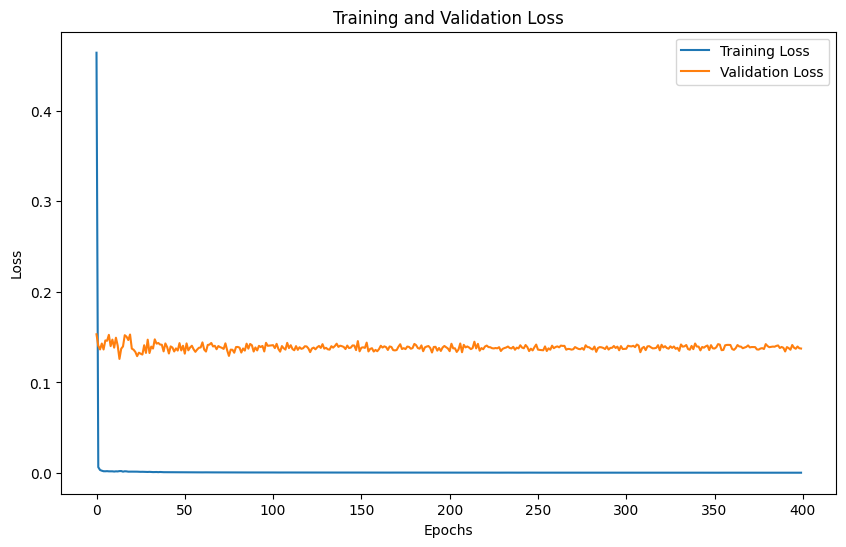

In [45]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import History
import matplotlib.pyplot as plt

# Define the neural network model
def create_model(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mse'])
    return model

# Prepare the data
X_train = df_train[all_feature_cols].values
y_train = df_train['p0q0'].values
X_test = df_test_preprocessed[all_feature_cols].values
y_test = df_test_preprocessed['p0q0'].values

# Create the model
model = create_model(X_train.shape[1])

# Train the model and store the training history
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=400, batch_size=32)

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [46]:
# Calculate RMSE
y_pred = model.predict(X_test)
RMSE_nn = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE Neural Network:', RMSE_nn)

247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step
RMSE Neural Network: 0.3706456680608082


In [121]:
#! pip install autogluon

x_train = pd.read_csv('./Xtrain_hgcGIrA.csv')
y_train = pd.read_csv('./Ytrain_yL5OjS4.csv')
x_test = pd.read_csv('./Xtest.csv')
y_sample = pd.read_csv('./Ysample_iX1anNa.csv')

# Add p0q0 
x_train['p0q0'] = y_train['p0q0']
x_test['p0q0'] = y_sample['p0q0']

from autogluon.tabular import TabularPredictor
predictor = TabularPredictor(label='p0q0').fit(train_data=x_train)
predictions = predictor.predict(x_test)

No path specified. Models will be saved in: "AutogluonModels/ag-20241211_012310"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #49~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Wed Nov  6 17:42:15 UTC 2
CPU Count:          8
Memory Avail:       10.50 GB / 19.41 GB (54.1%)
Disk Space Avail:   836.77 GB / 930.26 GB (89.9%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in

[1000]	valid_set's rmse: 0.016448
[2000]	valid_set's rmse: 0.0159024
[3000]	valid_set's rmse: 0.0157623
[4000]	valid_set's rmse: 0.0156957
[5000]	valid_set's rmse: 0.0156695
[6000]	valid_set's rmse: 0.0156511
[7000]	valid_set's rmse: 0.0156792
[8000]	valid_set's rmse: 0.0156989


	-0.0156	 = Validation score   (-root_mean_squared_error)
	12.84s	 = Training   runtime
	0.7s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's rmse: 0.0161264
[2000]	valid_set's rmse: 0.0159296
[3000]	valid_set's rmse: 0.015915


	-0.0159	 = Validation score   (-root_mean_squared_error)
	5.25s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-0.0177	 = Validation score   (-root_mean_squared_error)
	19.93s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: CatBoost ...
	-0.0158	 = Validation score   (-root_mean_squared_error)
	118.3s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-0.0167	 = Validation score   (-root_mean_squared_error)
	6.96s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-0.0164	 = Validation score   (-root_mean_squared_error)
	29.48s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: XGBoost ...
	-0.0156	 = Validation score   (-root_mean_squared_error)
	6.72s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-0.023	 = Validation score   (-root_mean_squared_error)
	49.95s	 = Training   runtime
	0.02s	 = Validation ru

[1000]	valid_set's rmse: 0.0161082
[2000]	valid_set's rmse: 0.0160409


	-0.016	 = Validation score   (-root_mean_squared_error)
	9.4s	 = Training   runtime
	0.13s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	Ensemble Weights: {'LightGBMXT': 0.261, 'NeuralNetFastAI': 0.261, 'XGBoost': 0.261, 'CatBoost': 0.13, 'RandomForestMSE': 0.043, 'ExtraTreesMSE': 0.043}
	-0.0147	 = Validation score   (-root_mean_squared_error)
	0.02s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 263.15s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 2462.6 rows/s (2500 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/media/arthur/HD/Users/arthu/projetos/machine-learning-for-networks/project/AutogluonModels/ag-20241211_012310")


In [130]:
predictor = TabularPredictor.load("/media/arthur/HD/Users/arthu/projetos/machine-learning-for-networks/project/AutogluonModels/ag-20241211_012310")

predictor.evaluate(x_test)

{'root_mean_squared_error': -0.4197631785901537,
 'mean_squared_error': -0.1762011261001093,
 'mean_absolute_error': -0.3428852462157734,
 'r2': -1.1380229801971264,
 'pearsonr': -0.00034718306570084324,
 'median_absolute_error': -0.3042307014465332}

In [131]:
predictor.leaderboard(x_test)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,KNeighborsDist,-0.402479,-0.065125,root_mean_squared_error,0.088340,0.026568,0.053639,0.088340,0.026568,0.053639,1,True,2
1,KNeighborsUnif,-0.402479,-0.083411,root_mean_squared_error,0.091594,0.026319,0.054304,0.091594,0.026319,0.054304,1,True,1
2,NeuralNetTorch,-0.413552,-0.022988,root_mean_squared_error,0.050451,0.015437,49.946575,0.050451,0.015437,49.946575,1,True,10
3,LightGBMXT,-0.419352,-0.015647,root_mean_squared_error,3.566449,0.697394,12.843390,3.566449,0.697394,12.843390,1,True,3
4,CatBoost,-0.419583,-0.015766,root_mean_squared_error,0.062144,0.008797,118.303798,0.062144,0.008797,118.303798,1,True,6
5,WeightedEnsemble_L2,-0.419763,-0.014675,root_mean_squared_error,5.353852,1.015203,194.265181,0.008684,0.000551,0.020796,2,True,12
6,LightGBM,-0.419978,-0.015889,root_mean_squared_error,0.726526,0.121344,5.247526,0.726526,0.121344,5.247526,1,True,4
7,XGBoost,-0.420019,-0.015648,root_mean_squared_error,0.319945,0.063056,6.720041,0.319945,0.063056,6.720041,1,True,9
8,ExtraTreesMSE,-0.420068,-0.016698,root_mean_squared_error,0.356590,0.100216,6.961895,0.356590,0.100216,6.961895,1,True,7
9,LightGBMLarge,-0.420126,-0.016041,root_mean_squared_error,0.919892,0.134956,9.404408,0.919892,0.134956,9.404408,1,True,11
